In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kendalltau
from scipy.stats import mannwhitneyu
from scipy.stats import pearsonr, spearmanr, kendalltau

import datetime

# Read data

In [3]:
df = pd.read_csv('/Users/julianeoliveira/Documents/Projects/Bruno/Datalake/sinan_TB.csv', low_memory=False)

In [4]:
df_event = pd.read_csv('/Users/julianeoliveira/Documents/Projects/Bruno/Datalake/dados_final_consolidado.csv', sep=';',low_memory=False)


In [178]:
df_event.columns

Index(['id_evento_grupo', 'protocolo', 'tipo_documento', 'ibge', 'municipio',
       'uf', 'cobrade', 'regiao', 'tipologia', 'descricao_tipologia',
       'grupo_de_desastre', 'data_inicio', 'data_fim', 'obitos', 'feridos',
       'enfermos', 'desabrigados', 'desalojados', 'desaparecidos', 'outros',
       'saude_dest', 'saude_danif', 'saude_valor', 'ensino_dest',
       'ensino_danif', 'ensino_valor', 'outros_dest', 'outros_danif',
       'outros_valor', 'comuni_dest', 'comuni_danif', 'comuni_valor',
       'hab_dest', 'habt_danif', 'hab_valor', 'infra_dest', 'infra_danif',
       'infra_valor', 'agricultura', 'pecuaria', 'industria', 'servicos',
       'total_privado', 'saude', 'agua', 'esgoto', 'limpeza', 'pragas',
       'energia', 'telecom', 'transportes', 'combustiveis', 'seguranca',
       'ensino', 'total_publico', 'total_danos_materiais',
       'total_danos_humanos', 'prejuizos_totais', 'diff_dias', 'n_protocolo'],
      dtype='object')

In [201]:
df_event[['id_evento_grupo', 'protocolo', 'tipo_documento', 'ibge', 'municipio',
       'uf', 'cobrade', 'regiao', 'tipologia', 'descricao_tipologia',
       'grupo_de_desastre', 'data_inicio', 'data_fim']]

,id_evento_grupo,protocolo,tipo_documento,ibge,municipio,uf,cobrade,regiao,tipologia,descricao_tipologia,grupo_de_desastre,data_inicio,data_fim
0,1100015_12200_1,RO-A-1100015-12200-20070223,A,1100015,Alta Floresta DOeste,RO,12200,Norte,2,Enxurradas,Hidrológico,2007-02-23,2007-02-23
1,1100015_12200_2,RO-A-1100015-12200-20090313,A,1100015,Alta Floresta DOeste,RO,12200,Norte,2,Enxurradas,Hidrológico,2009-03-13,2009-03-13
2,1100015_12200_3,RO-A-1100015-12200-20100116,A,1100015,Alta Floresta DOeste,RO,12200,Norte,2,Enxurradas,Hidrológico,2010-01-16,2010-01-16
3,1100015_13214_1,RO-F-1100015-13214-20220322,F,1100015,Alta Floresta D`Oeste,RO,13214,Norte,13,Chuvas Intensas,Hidrológico,2022-03-22,2022-03-22
4,1100023_12100_1,RO-F-1100023-12100-20220225,F,1100023,Ariquemes,RO,12100,Norte,7,Inundações,Hidrológico,2022-02-25,2022-02-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62263,5300108_13215_2,DF-F-5300108-13215-20161020,F,5300108,Brasília,DF,13215,Centro-oeste,12,Vendavais e Ciclones,Meteorológico,2016-10-20,2016-10-20
62264,5300108_14110_1,DF-F-5300108-14110-20170125,F,5300108,Brasília,DF,14110,Centro-oeste,4,Estiagem e Seca,Climatológico,2017-01-25,2017-01-25
62265,5300108_15110_1,DF-F-5300108-15110-20190606,F,5300108,Brasília,DF,15110,Centro-oeste,16,Doenças infecciosas,Outros,2019-06-06,2019-06-06
62266,5300108_23120_1,DF-F-5300108-23120-20210324,F,5300108,Brasília,DF,23120,Centro-oeste,14,Outros,Outros,2021-03-24,2021-03-24


# Pre-processing the data

In [5]:
df = df.assign(NU_ANO = df.NU_ANO.astype(int),
               ones = 1,
               CS_SEXO = df.CS_SEXO.astype(str)
              )

df = df[(df.NU_ANO >= 2001) & (df.NU_ANO < 2024)]

df = df[df.CS_SEXO != 'I']

df['FORMA'] = df['FORMA'].replace([np.inf, -np.inf], np.nan)
df['FORMA'] = df['FORMA'].fillna(9)
df['FORMA'] = df['FORMA'].replace([0], 9)
df['FORMA'] = df['FORMA'].astype(int)

df['CS_RACA'] = df['CS_RACA'].replace([np.inf, -np.inf], np.nan)
df['CS_RACA'] = df['CS_RACA'].fillna(9)
df['CS_RACA'] = df['CS_RACA'].replace([0, 6], 9)
df['CS_RACA'] = df['CS_RACA'].astype(int)

df['POP_LIBER'] = df['POP_LIBER'].replace([np.inf, -np.inf], np.nan) 
df['POP_LIBER'] = df['POP_LIBER'].replace([0, 9], np.nan)

df['POP_RUA'] = df['POP_RUA'].replace([np.inf, -np.inf], np.nan) 
df['POP_RUA'] = df['POP_RUA'].replace([0, 9], np.nan)

df['POP_SAUDE'] = df['POP_SAUDE'].replace([np.inf, -np.inf], np.nan) 
df['POP_SAUDE'] = df['POP_SAUDE'].replace([0, 3, 9], np.nan)

df['POP_IMIG'] = df['POP_IMIG'].replace([np.inf, -np.inf], np.nan) 
df['POP_IMIG'] = df['POP_IMIG'].replace([0, 3, 9], np.nan)

df['BENEF_GOV'] = df['BENEF_GOV'].replace([np.inf, -np.inf], np.nan) 
df['BENEF_GOV'] = df['BENEF_GOV'].replace([0, 3, 4, 5, 6, 7, 8, 9], np.nan)

In [6]:
#### The following variables are null and we will exclude from the data

#DT_TRANSDM, DT_TRANSSM, DT_TRANSRM, DT_TRANSRS, DT_TRANSSE, CS_FLXRET,FLXRECEBI

cols_to_drop = [
    'DT_TRANSDM', 'DT_TRANSSM', 'DT_TRANSRM',
    'DT_TRANSRS', 'DT_TRANSSE', 'CS_FLXRET', 'FLXRECEBI'
]

# Drop the columns
df.drop(columns=cols_to_drop, inplace=True)

In [7]:
### Set period of study and type of TB valid

df = df[(df.NU_ANO >= 2005) & (df.FORMA != 9)]

In [8]:
df_des = df_event[['id_evento_grupo', 'protocolo', 'tipo_documento', 'ibge', 'municipio',
             'uf', 'cobrade', 'regiao', 'tipologia', 'descricao_tipologia',
             'grupo_de_desastre', 'data_inicio', 'data_fim']]

In [9]:
df_des = df_des.assign(data_inicio = pd.to_datetime(df_des.data_inicio),
                      data_fim = pd.to_datetime(df_des.data_fim),
                      year_inicio = pd.DatetimeIndex(df_des.data_inicio).year,
                      year_fim = pd.DatetimeIndex(df_des.data_fim).year,
                      month_inicio = pd.DatetimeIndex(df_des.data_inicio).month,
                      month_fim = pd.DatetimeIndex(df_des.data_fim).month,
                      ones = 1)

In [10]:
df_des = df_des[(df_des.year_inicio >= 2005) & (df_des.descricao_tipologia != 'Doenças infecciosas') & (df_des.descricao_tipologia != 'Outros')]

# Start initial analysis

In [71]:
df.columns

Index(['TP_NOT', 'ID_AGRAVO', 'DT_NOTIFIC', 'NU_ANO', 'SG_UF_NOT',
       'ID_MUNICIP', 'ID_REGIONA', 'DT_DIAG', 'ANO_NASC', 'NU_IDADE_N',
       'CS_SEXO', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF', 'ID_MN_RESI',
       'ID_RG_RESI', 'ID_PAIS', 'NDUPLIC_N', 'IN_VINCULA', 'DT_DIGITA',
       'DT_TRANSUS', 'MIGRADO_W', 'ID_OCUPA_N', 'TRATAMENTO', 'INSTITUCIO',
       'RAIOX_TORA', 'TESTE_TUBE', 'FORMA', 'EXTRAPU1_N', 'EXTRAPU2_N',
       'EXTRAPUL_O', 'AGRAVAIDS', 'AGRAVALCOO', 'AGRAVDIABE', 'AGRAVDOENC',
       'AGRAVOUTRA', 'AGRAVOUTDE', 'BACILOSC_E', 'BACILOS_E2', 'BACILOSC_O',
       'CULTURA_ES', 'CULTURA_OU', 'HIV', 'HISTOPATOL', 'DT_INIC_TR',
       'RIFAMPICIN', 'ISONIAZIDA', 'ETAMBUTOL', 'ESTREPTOMI', 'PIRAZINAMI',
       'ETIONAMIDA', 'OUTRAS', 'OUTRAS_DES', 'TRAT_SUPER', 'NU_CONTATO',
       'DOENCA_TRA', 'SG_UF_AT', 'ID_MUNIC_A', 'DT_NOTI_AT', 'SG_UF_2',
       'ID_MUNIC_2', 'BACILOSC_1', 'BACILOSC_2', 'BACILOSC_3', 'BACILOSC_4',
       'BACILOSC_5', 'BACILOSC_6', 'TRAT

In [13]:
df_des.ibge.nunique()

5003

In [61]:
#df_des[df_des.municipio == 'Rio de Janeiro']#.ibge

In [63]:
df_des.ibge.unique()

array([1100015, 1100023, 1100031, ..., 5221858, 5222054, 5300108])

In [64]:
set_muni = df_des[df_des.ibge == 1100023]

In [65]:
set_muni

,id_evento_grupo,protocolo,tipo_documento,ibge,municipio,uf,cobrade,regiao,tipologia,descricao_tipologia,grupo_de_desastre,data_inicio,data_fim,year_inicio,year_fim,month_inicio,month_fim,ones
4,1100023_12100_1,RO-F-1100023-12100-20220225,F,1100023,Ariquemes,RO,12100,Norte,7,Inundações,Hidrológico,2022-02-25,2022-02-25,2022,2022,2,2,1
5,1100023_12300_1,RO-F-1100023-12300-20190206,F,1100023,Ariquemes,RO,12300,Norte,1,Alagamentos,Hidrológico,2019-02-06,2019-02-06,2019,2019,2,2,1


In [66]:
set_muni_tb = df[df.ID_MN_RESI == 110002]

In [67]:
set_muni_tb.ones.sum()

702

In [68]:
dta1 = set_muni_tb.groupby(['DT_NOTIFIC'])['ones'].sum().reset_index()

<ipython-input-69-a001d898cc59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_muni_tb["DT_NOTIFIC"] = pd.to_datetime(set_muni_tb["DT_NOTIFIC"])


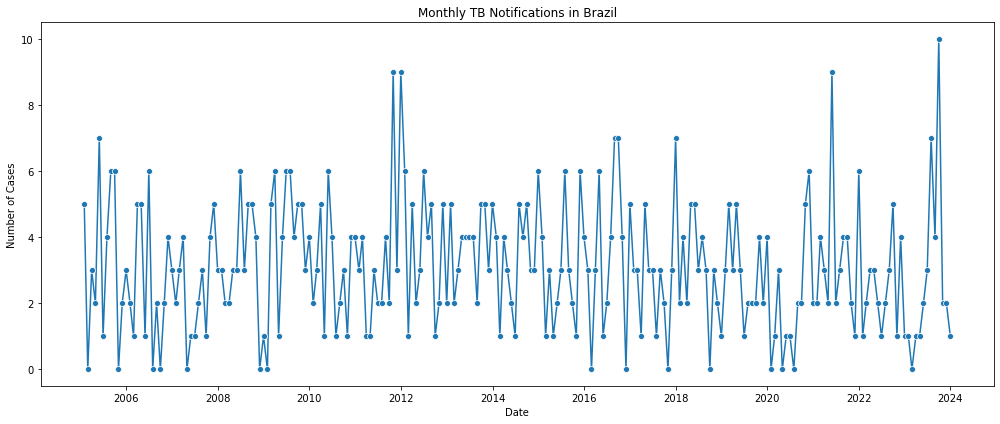

In [69]:
# Ensure datetime
set_muni_tb["DT_NOTIFIC"] = pd.to_datetime(set_muni_tb["DT_NOTIFIC"])

monthly = set_muni_tb.groupby(pd.Grouper(key="DT_NOTIFIC", freq="M"))["ones"].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly, x="DT_NOTIFIC", y="ones", marker="o")
plt.title("Monthly TB Notifications in Brazil")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.tight_layout()
plt.show()


<ipython-input-70-847ebb253e25>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_muni_tb["DT_NOTIFIC"] = pd.to_datetime(set_muni_tb["DT_NOTIFIC"])
<ipython-input-70-847ebb253e25>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_muni["data_inicio"] = pd.to_datetime(set_muni["data_inicio"])


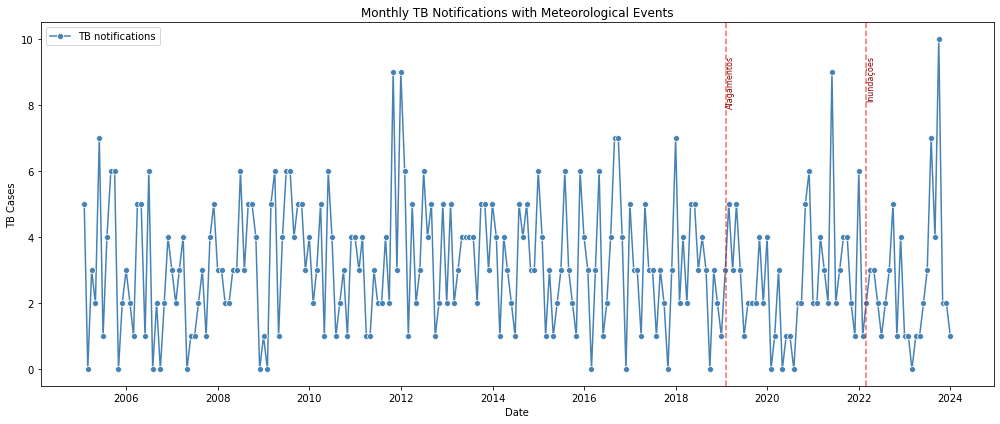

In [70]:

# --- TB Data ---
set_muni_tb["DT_NOTIFIC"] = pd.to_datetime(set_muni_tb["DT_NOTIFIC"])
monthly = set_muni_tb.groupby(pd.Grouper(key="DT_NOTIFIC", freq="M"))["ones"].sum().reset_index()

# --- Events Data ---
set_muni["data_inicio"] = pd.to_datetime(set_muni["data_inicio"])

events = set_muni.copy()

# --- Plot ---
plt.figure(figsize=(14,6))

# TB notifications line
sns.lineplot(data=monthly, x="DT_NOTIFIC", y="ones", marker="o", color="steelblue", label="TB notifications")

# Add event vertical lines
for _, row in events.iterrows():
    plt.axvline(row["data_inicio"], color="red", linestyle="--", alpha=0.6)
    # Optional: annotate with event type
    plt.text(row["data_inicio"], monthly["ones"].max()*0.95, 
             row["descricao_tipologia"], 
             rotation=90, fontsize=8, color="darkred", va="top")

plt.title("Monthly TB Notifications with Meteorological Events")
plt.xlabel("Date")
plt.ylabel("TB Cases")
plt.legend()
plt.tight_layout()
plt.show()


# Analise em relação a forma

In [128]:
df_des[df_des.municipio == 'Rio de Janeiro'].head(3)#.ibge

,id_evento_grupo,protocolo,tipo_documento,ibge,municipio,uf,cobrade,regiao,tipologia,descricao_tipologia,grupo_de_desastre,data_inicio,data_fim,year_inicio,year_fim,month_inicio,month_fim,ones
38267,3304557_11321_1,RJ-A-3304557-11321-20070104,A,3304557,Rio de Janeiro,RJ,11321,Sudeste,8,Movimento de Massa,Hidrológico,2007-01-04,2007-01-04,2007,2007,1,1,1
38268,3304557_11321_2,RJ-J-3304557-11321-20100306,T2,3304557,Rio de Janeiro,RJ,11321,Sudeste,8,Movimento de Massa,Hidrológico,2010-03-06,2010-04-05,2010,2010,3,4,1
38269,3304557_11321_2,RJ-J-3304557-11321-20100306,T2,3304557,Rio de Janeiro,RJ,11321,Sudeste,8,Movimento de Massa,Hidrológico,2010-03-06,2010-04-05,2010,2010,3,4,1


In [63]:
df_des.ibge.unique()

array([1100015, 1100023, 1100031, ..., 5221858, 5222054, 5300108])

In [129]:
set_muni = df_des[df_des.ibge == 3304557]
set_muni_tb = df[df.ID_MN_RESI == 330455]

In [130]:
dta1 = set_muni_tb.groupby(['DT_NOTIFIC', 'FORMA'])['ones'].sum().reset_index()

In [131]:
dta1.FORMA.unique()

array([1, 2, 3])

<ipython-input-132-760124fcf01a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_muni_tb["DT_NOTIFIC"] = pd.to_datetime(set_muni_tb["DT_NOTIFIC"])


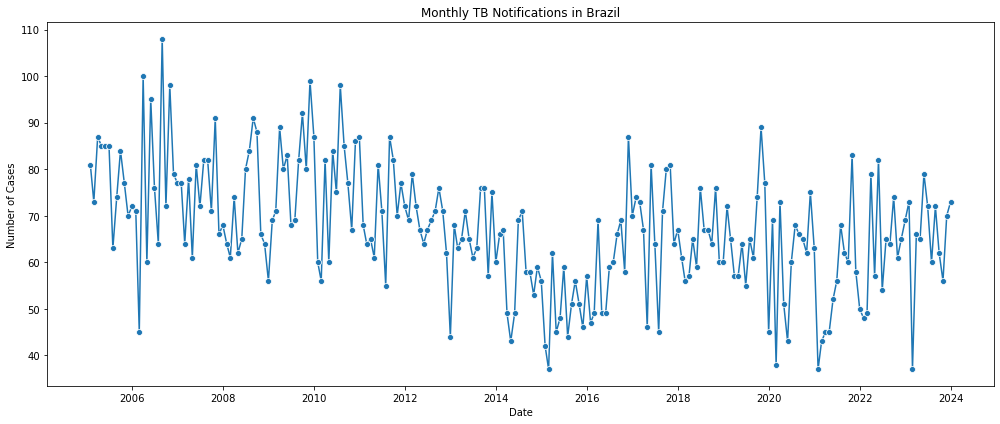

In [132]:
# Ensure datetime
set_muni_tb["DT_NOTIFIC"] = pd.to_datetime(set_muni_tb["DT_NOTIFIC"])

monthly = set_muni_tb[set_muni_tb.FORMA == 2].groupby(pd.Grouper(key="DT_NOTIFIC", freq="M"))["ones"].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly, x="DT_NOTIFIC", y="ones", marker="o")
plt.title("Monthly TB Notifications in Brazil")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.tight_layout()
plt.show()


<ipython-input-133-b70a13f7a4f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_muni["data_inicio"] = pd.to_datetime(set_muni["data_inicio"])


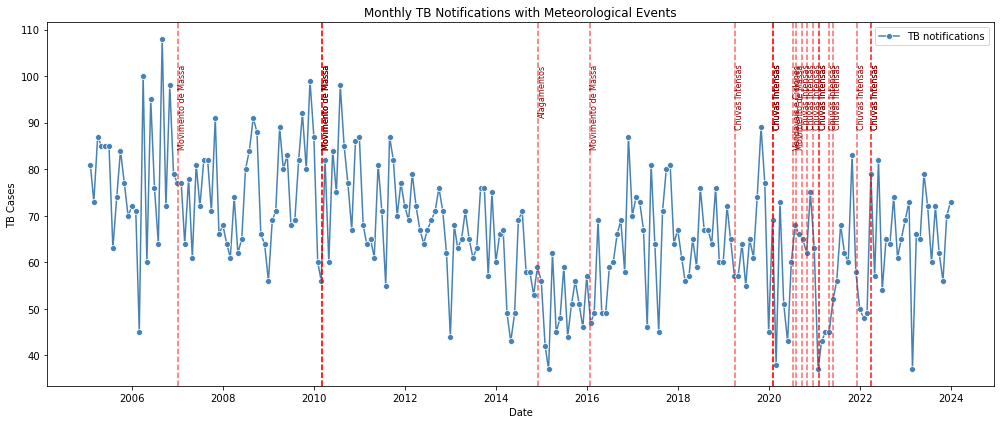

In [133]:
# --- Events Data ---
set_muni["data_inicio"] = pd.to_datetime(set_muni["data_inicio"])

events = set_muni.copy()

# --- Plot ---
plt.figure(figsize=(14,6))

# TB notifications line
sns.lineplot(data=monthly, x="DT_NOTIFIC", y="ones", marker="o", color="steelblue", label="TB notifications")

# Add event vertical lines
for _, row in events.iterrows():
    plt.axvline(row["data_inicio"], color="red", linestyle="--", alpha=0.6)
    # Optional: annotate with event type
    plt.text(row["data_inicio"], monthly["ones"].max()*0.95, 
             row["descricao_tipologia"], 
             rotation=90, fontsize=8, color="darkred", va="top")

plt.title("Monthly TB Notifications with Meteorological Events")
plt.xlabel("Date")
plt.ylabel("TB Cases")
plt.legend()
plt.tight_layout()
plt.show()


<ipython-input-134-a788b3784b45>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_muni_tb["DT_NOTIFIC"] = pd.to_datetime(set_muni_tb["DT_NOTIFIC"])


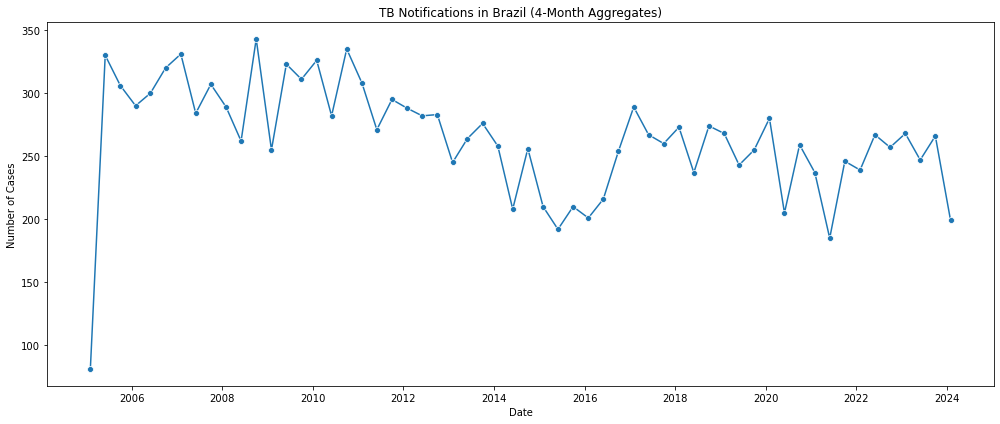

In [134]:
# Ensure datetime format
set_muni_tb["DT_NOTIFIC"] = pd.to_datetime(set_muni_tb["DT_NOTIFIC"])

# Group by 4-month periods
quad_monthly = (
    set_muni_tb[set_muni_tb.FORMA == 2]
    .groupby(pd.Grouper(key="DT_NOTIFIC", freq="4M"))["ones"]
    .sum()
    .reset_index()
)

# Plot
plt.figure(figsize=(14,6))
sns.lineplot(data=quad_monthly, x="DT_NOTIFIC", y="ones", marker="o")
plt.title("TB Notifications in Brazil (4-Month Aggregates)")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.tight_layout()
plt.show()


<ipython-input-135-32f46be872df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_muni["data_inicio"] = pd.to_datetime(set_muni["data_inicio"])


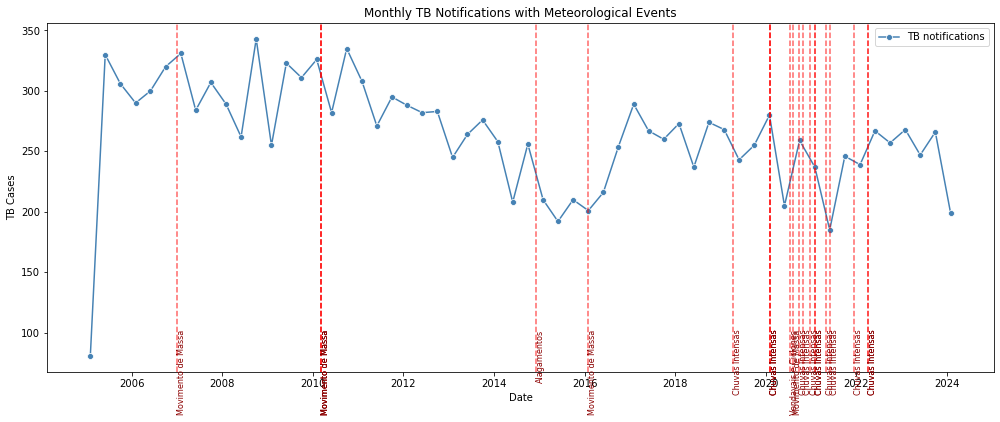

In [135]:
# --- Events Data ---
set_muni["data_inicio"] = pd.to_datetime(set_muni["data_inicio"])

events = set_muni.copy()

# --- Plot ---
plt.figure(figsize=(14,6))

# TB notifications line
sns.lineplot(data=quad_monthly, x="DT_NOTIFIC", y="ones", marker="o", color="steelblue", label="TB notifications")

# Add event vertical lines
for _, row in events.iterrows():
    plt.axvline(row["data_inicio"], color="red", linestyle="--", alpha=0.6)
    # Optional: annotate with event type
    plt.text(row["data_inicio"], monthly["ones"].max()*0.95, 
             row["descricao_tipologia"], 
             rotation=90, fontsize=8, color="darkred", va="top")

plt.title("Monthly TB Notifications with Meteorological Events")
plt.xlabel("Date")
plt.ylabel("TB Cases")
plt.legend()
plt.tight_layout()
plt.show()



# Analise em relação a proporção entre forma e totais

In [128]:
df_des[df_des.municipio == 'Rio de Janeiro'].head(3)#.ibge

,id_evento_grupo,protocolo,tipo_documento,ibge,municipio,uf,cobrade,regiao,tipologia,descricao_tipologia,grupo_de_desastre,data_inicio,data_fim,year_inicio,year_fim,month_inicio,month_fim,ones
38267,3304557_11321_1,RJ-A-3304557-11321-20070104,A,3304557,Rio de Janeiro,RJ,11321,Sudeste,8,Movimento de Massa,Hidrológico,2007-01-04,2007-01-04,2007,2007,1,1,1
38268,3304557_11321_2,RJ-J-3304557-11321-20100306,T2,3304557,Rio de Janeiro,RJ,11321,Sudeste,8,Movimento de Massa,Hidrológico,2010-03-06,2010-04-05,2010,2010,3,4,1
38269,3304557_11321_2,RJ-J-3304557-11321-20100306,T2,3304557,Rio de Janeiro,RJ,11321,Sudeste,8,Movimento de Massa,Hidrológico,2010-03-06,2010-04-05,2010,2010,3,4,1


In [63]:
df_des.ibge.unique()

array([1100015, 1100023, 1100031, ..., 5221858, 5222054, 5300108])

In [136]:
set_muni = df_des[df_des.ibge == 3304557]
set_muni_tb = df[df.ID_MN_RESI == 330455]

In [137]:
dta1 = set_muni_tb.groupby(['DT_NOTIFIC', 'FORMA'])['ones'].sum().reset_index()

In [139]:
table = pd.pivot_table(dta1, values='ones', index=['DT_NOTIFIC'],
                       columns=['FORMA'], aggfunc="sum")


In [141]:
table = table.fillna(0)

In [144]:
table.columns

Int64Index([1, 2, 3], dtype='int64', name='FORMA')

In [147]:
table['tot'] = table[1] + table[2] + table[3] 
table = table.reset_index()

In [154]:
monthly = table.groupby(pd.Grouper(key="DT_NOTIFIC", freq="M"))[1,2,3, 'tot'].sum().reset_index()

<ipython-input-154-b0276186eb96>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  monthly = table.groupby(pd.Grouper(key="DT_NOTIFIC", freq="M"))[1,2,3, 'tot'].sum().reset_index()


In [155]:
monthly

FORMA,DT_NOTIFIC,1,2,3,tot
0,2005-01-31,499.0,81.0,18.0,598.0
1,2005-02-28,485.0,73.0,29.0,587.0
2,2005-03-31,585.0,87.0,31.0,703.0
3,2005-04-30,487.0,85.0,22.0,594.0
4,2005-05-31,587.0,85.0,23.0,695.0
...,...,...,...,...,...
223,2023-08-31,792.0,72.0,22.0,886.0
224,2023-09-30,658.0,62.0,22.0,742.0
225,2023-10-31,666.0,56.0,15.0,737.0
226,2023-11-30,653.0,70.0,16.0,739.0


In [156]:
monthly = monthly.assign(rat_1 = monthly[1]/monthly.tot,
                    rat_2 = monthly[2]/monthly.tot,
                    rat_3 = monthly[3]/monthly.tot)

In [157]:
monthly

FORMA,DT_NOTIFIC,1,2,3,tot,rat_1,rat_2,rat_3
0,2005-01-31,499.0,81.0,18.0,598.0,0.834448,0.135452,0.030100
1,2005-02-28,485.0,73.0,29.0,587.0,0.826235,0.124361,0.049404
2,2005-03-31,585.0,87.0,31.0,703.0,0.832148,0.123755,0.044097
3,2005-04-30,487.0,85.0,22.0,594.0,0.819865,0.143098,0.037037
4,2005-05-31,587.0,85.0,23.0,695.0,0.844604,0.122302,0.033094
...,...,...,...,...,...,...,...,...
223,2023-08-31,792.0,72.0,22.0,886.0,0.893905,0.081264,0.024831
224,2023-09-30,658.0,62.0,22.0,742.0,0.886792,0.083558,0.029650
225,2023-10-31,666.0,56.0,15.0,737.0,0.903664,0.075984,0.020353
226,2023-11-30,653.0,70.0,16.0,739.0,0.883627,0.094723,0.021651


No handles with labels found to put in legend.


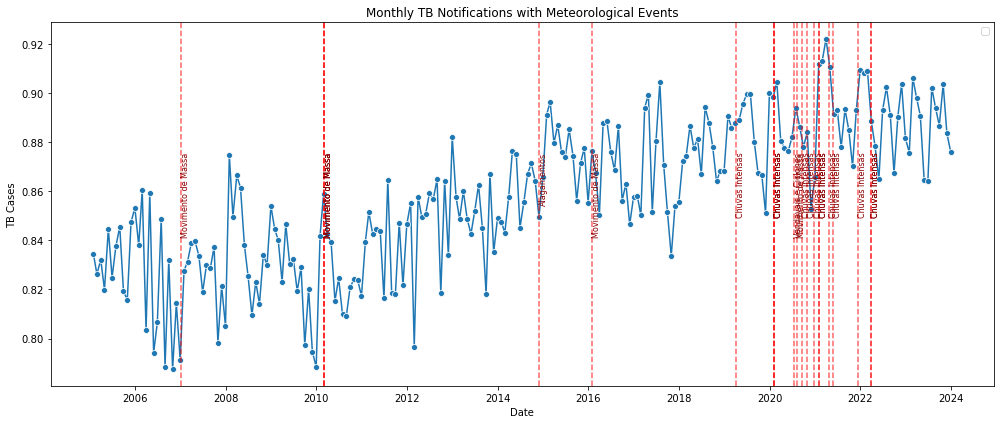

In [165]:
# Ensure datetime
#table["DT_NOTIFIC"] = pd.to_datetime(table["DT_NOTIFIC"])

#monthly = table.groupby(pd.Grouper(key="DT_NOTIFIC", freq="M"))["ones"].sum().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly, x="DT_NOTIFIC", y="rat_1", marker="o")
plt.title("Monthly TB Notifications in Brazil")
plt.xlabel("Date")
plt.ylabel("Number of Cases")


# Add event vertical lines
for _, row in events.iterrows():
    plt.axvline(row["data_inicio"], color="red", linestyle="--", alpha=0.6)
 
    plt.text(row["data_inicio"], monthly["rat_1"].max()*0.95, 
             row["descricao_tipologia"], 
             rotation=90, fontsize=8, color="darkred", va="top")



plt.title("Monthly TB Notifications with Meteorological Events")
plt.xlabel("Date")
plt.ylabel("TB Cases")
plt.legend()


plt.tight_layout()
plt.show()


No handles with labels found to put in legend.


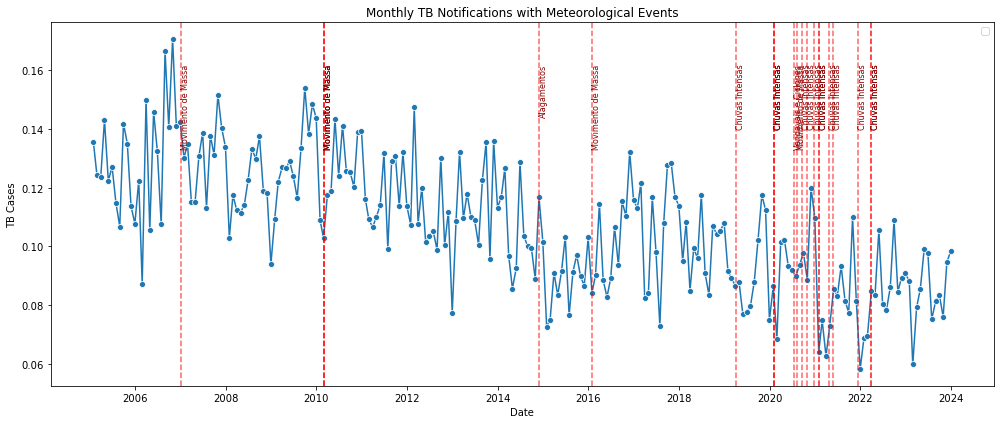

In [161]:

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly, x="DT_NOTIFIC", y="rat_2", marker="o")
plt.title("Monthly TB Notifications in Brazil")
plt.xlabel("Date")
plt.ylabel("Number of Cases")


# Add event vertical lines
for _, row in events.iterrows():
    plt.axvline(row["data_inicio"], color="red", linestyle="--", alpha=0.6)
    # Optional: annotate with event type
    plt.text(row["data_inicio"], monthly["rat_2"].max()*0.95, 
             row["descricao_tipologia"], 
             rotation=90, fontsize=8, color="darkred", va="top")

plt.title("Monthly TB Notifications with Meteorological Events")
plt.xlabel("Date")
plt.ylabel("TB Cases")
plt.legend()
plt.tight_layout()
plt.show()

No handles with labels found to put in legend.


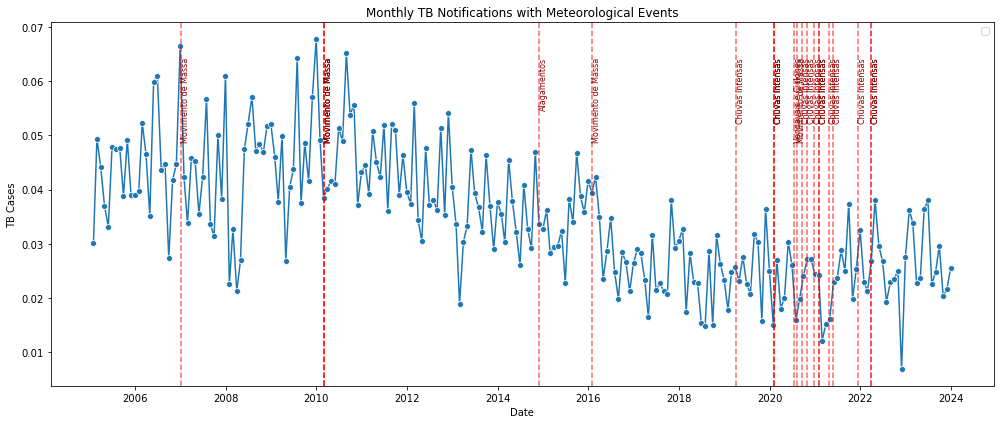

In [162]:

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly, x="DT_NOTIFIC", y="rat_3", marker="o")
plt.title("Monthly TB Notifications in Brazil")
plt.xlabel("Date")
plt.ylabel("Number of Cases")


# Add event vertical lines
for _, row in events.iterrows():
    plt.axvline(row["data_inicio"], color="red", linestyle="--", alpha=0.6)
    # Optional: annotate with event type
    plt.text(row["data_inicio"], monthly["rat_3"].max()*0.95, 
             row["descricao_tipologia"], 
             rotation=90, fontsize=8, color="darkred", va="top")

plt.title("Monthly TB Notifications with Meteorological Events")
plt.xlabel("Date")
plt.ylabel("TB Cases")
plt.legend()
plt.tight_layout()
plt.show()

In [166]:
monthly

FORMA,DT_NOTIFIC,1,2,3,tot,rat_1,rat_2,rat_3
0,2005-01-31,499.0,81.0,18.0,598.0,0.834448,0.135452,0.030100
1,2005-02-28,485.0,73.0,29.0,587.0,0.826235,0.124361,0.049404
2,2005-03-31,585.0,87.0,31.0,703.0,0.832148,0.123755,0.044097
3,2005-04-30,487.0,85.0,22.0,594.0,0.819865,0.143098,0.037037
4,2005-05-31,587.0,85.0,23.0,695.0,0.844604,0.122302,0.033094
...,...,...,...,...,...,...,...,...
223,2023-08-31,792.0,72.0,22.0,886.0,0.893905,0.081264,0.024831
224,2023-09-30,658.0,62.0,22.0,742.0,0.886792,0.083558,0.029650
225,2023-10-31,666.0,56.0,15.0,737.0,0.903664,0.075984,0.020353
226,2023-11-30,653.0,70.0,16.0,739.0,0.883627,0.094723,0.021651


In [172]:
# Pearson correlation
pearson_corr, pearson_p = pearsonr(monthly['rat_1'], monthly['rat_2'])
print(f"Pearson: correlation={pearson_corr:.3f}, p-value={pearson_p:.3f}")

# Spearman correlation
spearman_corr, spearman_p = spearmanr(monthly['rat_1'], monthly['rat_2'])
print(f"Spearman: correlation={spearman_corr:.3f}, p-value={spearman_p:.3f}")

# Kendall correlation
kendall_corr, kendall_p = kendalltau(monthly['rat_1'], monthly['rat_2'])
print(f"Kendall: correlation={kendall_corr:.3f}, p-value={kendall_p:.3f}")

Pearson: correlation=-0.943, p-value=0.000
Spearman: correlation=-0.942, p-value=0.000
Kendall: correlation=-0.791, p-value=0.000


In [173]:
# Pearson correlation
pearson_corr, pearson_p = pearsonr(monthly['rat_1'], monthly['rat_3'])
print(f"Pearson: correlation={pearson_corr:.3f}, p-value={pearson_p:.3f}")

# Spearman correlation
spearman_corr, spearman_p = spearmanr(monthly['rat_1'], monthly['rat_3'])
print(f"Spearman: correlation={spearman_corr:.3f}, p-value={spearman_p:.3f}")

# Kendall correlation
kendall_corr, kendall_p = kendalltau(monthly['rat_1'], monthly['rat_3'])
print(f"Kendall: correlation={kendall_corr:.3f}, p-value={kendall_p:.3f}")




Pearson: correlation=-0.787, p-value=0.000
Spearman: correlation=-0.780, p-value=0.000
Kendall: correlation=-0.581, p-value=0.000


In [174]:
# Pearson correlation
pearson_corr, pearson_p = pearsonr(monthly['rat_2'], monthly['rat_3'])
print(f"Pearson: correlation={pearson_corr:.3f}, p-value={pearson_p:.3f}")

# Spearman correlation
spearman_corr, spearman_p = spearmanr(monthly['rat_2'], monthly['rat_3'])
print(f"Spearman: correlation={spearman_corr:.3f}, p-value={spearman_p:.3f}")

# Kendall correlation
kendall_corr, kendall_p = kendalltau(monthly['rat_3'], monthly['rat_3'])
print(f"Kendall: correlation={kendall_corr:.3f}, p-value={kendall_p:.3f}")

Pearson: correlation=0.535, p-value=0.000
Spearman: correlation=0.537, p-value=0.000
Kendall: correlation=1.000, p-value=0.000
